In [562]:
#必要なライブラリをインポート
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
import pandas_profiling as pdp 

In [563]:
#モデルは区ごとに作った方が精度高いものが出来そう。

In [564]:
#東京都23区の物件を個別に保存しておいたものを読み込み、結合
'''
df_arakawa = pd.read_csv('suumo_arakawa.csv', sep='\t', encoding='utf-16')
df_bunkyo = pd.read_csv('suumo_bunkyo.csv', sep='\t', encoding='utf-16')
df_chiyoda = pd.read_csv('suumo_chiyoda.csv', sep='\t', encoding='utf-16')
df_chuo = pd.read_csv('suumo_chuo.csv', sep='\t', encoding='utf-16')
df_edogawa = pd.read_csv('suumo_edogawa.csv', sep='\t', encoding='utf-16')
df_itabashi = pd.read_csv('suumo_itabashi.csv', sep='\t', encoding='utf-16')
df_katsushika = pd.read_csv('suumo_katsushika.csv', sep='\t', encoding='utf-16')
df_kita = pd.read_csv('suumo_kita.csv', sep='\t', encoding='utf-16')
df_koto = pd.read_csv('suumo_koto.csv', sep='\t', encoding='utf-16')
df_meguro = pd.read_csv('suumo_meguro.csv', sep='\t', encoding='utf-16')
df_minato = pd.read_csv('suumo_minato.csv', sep='\t', encoding='utf-16')
df_nakano = pd.read_csv('suumo_nakano.csv', sep='\t', encoding='utf-16')
df_nerima = pd.read_csv('suumo_nerima.csv', sep='\t', encoding='utf-16')
df_ota = pd.read_csv('suumo_ota.csv', sep='\t', encoding='utf-16')
df_setagaya = pd.read_csv('suumo_setagaya.csv', sep='\t', encoding='utf-16')
df_shibuya = pd.read_csv('suumo_shibuya.csv', sep='\t', encoding='utf-16')
df_shinagawa = pd.read_csv('suumo_shinagawa.csv', sep='\t', encoding='utf-16')
df_shinjuku = pd.read_csv('suumo_shinjuku.csv', sep='\t', encoding='utf-16')
df_suginami = pd.read_csv('suumo_suginami.csv', sep='\t', encoding='utf-16')
df_sumida = pd.read_csv('suumo_sumida.csv', sep='\t', encoding='utf-16')
df_taito = pd.read_csv('suumo_taito.csv', sep='\t', encoding='utf-16')
df_toshima = pd.read_csv('suumo_toshima.csv', sep='\t', encoding='utf-16')


df = pd.concat([df_adachi,df_arakawa,df_bunkyo,df_chiyoda,df_chuo,df_edogawa,
               df_itabashi,df_katsushika,df_kita,df_koto,df_meguro,df_minato,
               df_nakano,df_nerima,df_ota,df_setagaya,df_shibuya,df_shinagawa,
               df_shinjuku,df_suginami,df_sumida,df_taito,df_toshima], axis=0,
              ignore_index=True)
'''

"\ndf_arakawa = pd.read_csv('suumo_arakawa.csv', sep='\t', encoding='utf-16')\ndf_bunkyo = pd.read_csv('suumo_bunkyo.csv', sep='\t', encoding='utf-16')\ndf_chiyoda = pd.read_csv('suumo_chiyoda.csv', sep='\t', encoding='utf-16')\ndf_chuo = pd.read_csv('suumo_chuo.csv', sep='\t', encoding='utf-16')\ndf_edogawa = pd.read_csv('suumo_edogawa.csv', sep='\t', encoding='utf-16')\ndf_itabashi = pd.read_csv('suumo_itabashi.csv', sep='\t', encoding='utf-16')\ndf_katsushika = pd.read_csv('suumo_katsushika.csv', sep='\t', encoding='utf-16')\ndf_kita = pd.read_csv('suumo_kita.csv', sep='\t', encoding='utf-16')\ndf_koto = pd.read_csv('suumo_koto.csv', sep='\t', encoding='utf-16')\ndf_meguro = pd.read_csv('suumo_meguro.csv', sep='\t', encoding='utf-16')\ndf_minato = pd.read_csv('suumo_minato.csv', sep='\t', encoding='utf-16')\ndf_nakano = pd.read_csv('suumo_nakano.csv', sep='\t', encoding='utf-16')\ndf_nerima = pd.read_csv('suumo_nerima.csv', sep='\t', encoding='utf-16')\ndf_ota = pd.read_csv('suumo_o

In [565]:
item = 'chiyoda'
df = pd.read_csv(f'suumo_{item}_all.csv', sep='\t', encoding='utf-16')


#不要な列を削除
df.drop(['Unnamed: 0'], axis=1, inplace=True)

#立地を「最寄駅」と「徒歩〜分」に分割
splitted1 = df['立地1'].str.split(' 歩', expand=True)
splitted1.columns = ['立地11', '立地12']
splitted2 = df['立地2'].str.split(' 歩', expand=True)
splitted2.columns = ['立地21', '立地22']
splitted3 = df['立地3'].str.split(' 歩', expand=True)
splitted3.columns = ['立地31', '立地32']

#その他費用を、「敷金」「礼金」「保証金」「敷引,償却」に分割
splitted4 = df['敷/礼/保証/敷引,償却'].str.split('/', expand=True)
splitted4.columns = ['敷金', '礼金']

In [566]:
#「敷引,償却」をさらに「敷引」「償却」に分割
#splitted5 = df['敷引,償却'].str.split('・', expand=True)
#splitted5.columns = ['敷引', '償却']

#分割したカラムを結合
df = pd.concat([df, splitted1, splitted2, splitted3, splitted4], axis=1)

#分割前のカラムは分析に使用しないので削除しておく
df.drop(['立地1','立地2','立地3','敷/礼/保証/敷引,償却'], axis=1, inplace=True)

#「賃料」がNAの行を削除
df = df.dropna(subset=['賃料'])

#エンコードをcp932に変更しておく（これをしないと、replaceできない）
df['賃料'].str.encode('cp932')
df['敷金'].str.encode('cp932')
df['礼金'].str.encode('cp932')
#df['保証金'].str.encode('cp932')
#df['敷引'].str.encode('cp932')
#df['償却'].str.encode('cp932')
df['管理費'].str.encode('cp932')
df['築年数'].str.encode('cp932')
df['専有面積'].str.encode('cp932')
df['立地12'].str.encode('cp932')
df['立地22'].str.encode('cp932')
df['立地32'].str.encode('cp932')

#数値として扱いたいので、不要な文字列を削除
df['賃料'] = df['賃料'].str.replace(u'万円', u'')
df['敷金'] = df['敷金'].str.replace(u'万円', u'')
df['礼金'] = df['礼金'].str.replace(u'万円', u'')
#df['保証金'] = df['保証金'].str.replace(u'万円', u'')
#df['敷引'] = df['敷引'].str.replace(u'万円', u'')
#df['償却'] = df['償却'].str.replace(u'万円', u'')
df['管理費'] = df['管理費'].str.replace(u'円', u'')
df['築年数'] = df['築年数'].str.replace(u'新築', u'0') #新築は築年数0年とする
df['築年数'] = df['築年数'].str.replace(u'築', u'')
df['築年数'] = df['築年数'].str.replace(u'年', u'')
df['築年数'] = df['築年数'].str.replace(u'99年以上', u'99') #
df['専有面積'] = df['専有面積'].str.replace(u'm', u'')
df['立地12'] = df['立地12'].str.replace(u'分', u'')
df['立地22'] = df['立地22'].str.replace(u'分', u'')
df['立地32'] = df['立地32'].str.replace(u'分', u'')

#「-」を0に変換
df['管理費'] = df['管理費'].replace('-',0)
df['敷金'] = df['敷金'].replace('-',0)
df['礼金'] = df['礼金'].replace('-',0)
#df['保証金'] = df['保証金'].replace('-',0)
#df['敷引'] = df['敷引'].replace('-',0)
#df['敷引'] = df['敷引'].replace('実費',0) #「実費」と文字列が入っている場合がある
#df['償却'] = df['償却'].replace('-',0)

#Noneを0に変換
#df['償却'] = [0 if x is None else x for x in df['償却']]

#文字列から数値に変換
df['賃料'] = pd.to_numeric(df['賃料'])
df['管理費'] = pd.to_numeric(df['管理費'])
df['敷金'] = pd.to_numeric(df['敷金'])
df['礼金'] = pd.to_numeric(df['礼金'])
#df['保証金'] = pd.to_numeric(df['保証金'])
#df['敷引'] = pd.to_numeric(df['敷引'])
#df['償却'] = pd.to_numeric(df['償却'])
df['築年数'] = pd.to_numeric(df['築年数'])
df['専有面積'] = pd.to_numeric(df['専有面積'])
df['立地12'] = pd.to_numeric(df['立地12'])
df['立地22'] = pd.to_numeric(df['立地22'])
df['立地32'] = pd.to_numeric(df['立地32'])

#単位を合わせるために、管理費以外を10000倍。
df['賃料'] = df['賃料'] * 10000
df['敷金'] = df['敷金'] * 10000
df['礼金'] = df['礼金'] * 10000
#df['保証金'] = df['保証金'] * 10000
#df['敷引'] = df['敷引'] * 10000
#df['償却'] = df['償却'] * 10000

#管理費は実質的には賃料と同じく毎月支払うことになるため、「賃料+管理費」を家賃を見る指標とする
df['賃料+管理費'] = df['賃料'] + df['管理費']

#敷金/礼金と保証金は同じく初期費用であり、どちらかが適用されるため、合計を初期費用を見る指標とする
df['敷/礼/保証金'] = df['敷金'] + df['礼金'] #+ df['保証金']

#住所を「東京都」「〜区」「市町村番地」に分割
splitted6 = df['住所'].str.split('区', expand=True)
splitted6.columns = ['区', '市町村']
splitted6['区'] = splitted6['区'] + '区'
splitted6['区'] = splitted6['区'].str.replace('東京都','')

#路線と駅が３つ以上に分かれてしまう行を削除
#drop_idx = [98764] #手動でindexを確認
#df = df.drop(drop_idx, axis=0)

#立地を「路線」「駅」「徒歩〜分」に分割
splitted7 = df['立地11'].str.split('/', expand=True)
splitted7.columns = ['路線1', '駅1']
splitted7['徒歩1'] = df['立地12']
splitted8 = df['立地21'].str.split('/', expand=True)
splitted8.columns = ['路線2', '駅2']
splitted8['徒歩2'] = df['立地22']
splitted9 = df['立地31'].str.split('/', expand=True)
splitted9.columns = ['路線3', '駅3']
splitted9['徒歩3'] = df['立地32']

#結合
df = pd.concat([df, splitted6, splitted7, splitted8, splitted9], axis=1)

#不要なカラムを削除
df.drop(['立地11','立地12','立地21','立地22','立地31','立地32'], axis=1, inplace=True)

#階を数値化。地下はマイナスとして扱う

splitted10 = df['階'].str.split('-', expand=True)
splitted10.columns = ['階1', '階2']
splitted10['階1'].str.encode('cp932')
splitted10['階1'] = splitted10['階1'].str.replace(u'階', u'')
splitted10['階1'] = splitted10['階1'].str.replace(u'B', u'-')
splitted10['階1'] = pd.to_numeric(splitted10['階1'])
df = pd.concat([df, splitted10], axis=1)

#建物高さを数値化。地下は無視。
df['建物高さ'].str.encode('cp932')
df['建物高さ'] = df['建物高さ'].str.replace(u'地下1地上', u'')
df['建物高さ'] = df['建物高さ'].str.replace(u'地下2地上', u'')
df['建物高さ'] = df['建物高さ'].str.replace(u'地下3地上', u'')
df['建物高さ'] = df['建物高さ'].str.replace(u'地下4地上', u'')
df['建物高さ'] = df['建物高さ'].str.replace(u'地下5地上', u'')
df['建物高さ'] = df['建物高さ'].str.replace(u'地下6地上', u'')
df['建物高さ'] = df['建物高さ'].str.replace(u'地下7地上', u'')
df['建物高さ'] = df['建物高さ'].str.replace(u'地下8地上', u'')
df['建物高さ'] = df['建物高さ'].str.replace(u'地下9地上', u'')
df['建物高さ'] = df['建物高さ'].str.replace(u'平屋', u'1')
df['建物高さ'] = df['建物高さ'].str.replace(u'階建', u'')
df['建物高さ'] = pd.to_numeric(df['建物高さ'])

#indexを振り直す（これをしないと、以下の処理でエラーが出る）
df = df.reset_index(drop=True)

#間取りを「部屋数」「DK有無」「K有無」「L有無」「S有無」に分割
df['間取りDK'] = 0
df['間取りK'] = 0
df['間取りL'] = 0
df['間取りS'] = 0
df['間取り'].str.encode('cp932')
df['間取り'] = df['間取り'].str.replace(u'ワンルーム', u'1') #ワンルームを1に変換

for x in range(len(df)):
    if 'DK' in df['間取り'][x]:
        df.loc[x,'間取りDK'] = 1
df['間取り'] = df['間取り'].str.replace(u'DK',u'')

for x in range(len(df)):
    if 'K' in df['間取り'][x]:
        df.loc[x,'間取りK'] = 1        
df['間取り'] = df['間取り'].str.replace(u'K',u'')

for x in range(len(df)):
    if 'L' in df['間取り'][x]:
        df.loc[x,'間取りL'] = 1        
df['間取り'] = df['間取り'].str.replace(u'L',u'')

for x in range(len(df)):
    if 'S' in df['間取り'][x]:
        df.loc[x,'間取りS'] = 1        
df['間取り'] = df['間取り'].str.replace(u'S',u'')

df['間取り'] = pd.to_numeric(df['間取り'])

'''
#カラムを入れ替えて、csvファイルとして出力
df = df[['マンション名','住所','区','市町村','間取り','間取りDK','間取りK','間取りL','間取りS','築年数','建物高さ','階1','専有面積','賃料+管理費','敷/礼/保証金',
                '路線1','駅1','徒歩1','路線2','駅2','徒歩2','路線3','駅3','徒歩3','賃料','管理費',
                '敷金','礼金']]
'''


"\n#カラムを入れ替えて、csvファイルとして出力\ndf = df[['マンション名','住所','区','市町村','間取り','間取りDK','間取りK','間取りL','間取りS','築年数','建物高さ','階1','専有面積','賃料+管理費','敷/礼/保証金',\n                '路線1','駅1','徒歩1','路線2','駅2','徒歩2','路線3','駅3','徒歩3','賃料','管理費',\n                '敷金','礼金']]\n"

In [567]:
df[['区','市町村','路線1','路線2','路線3', '駅1', '駅2','駅3']] = df[['区','市町村','路線1','路線2','路線3', '駅1', '駅2','駅3']].fillna("NAN")
oe = preprocessing.OrdinalEncoder()
df[['区','市町村','路線1','路線2','路線3', '駅1','駅2','駅3']] = oe.fit_transform(df[['区','市町村','路線1','路線2','路線3', '駅1', '駅2','駅3']].values) 

In [568]:
#範囲限定
df = df[(df['賃料+管理費'] < 300000)]
df.reset_index(inplace=True)
df

,index,マンション名,住所,築年数,建物高さ,階,賃料,管理費,間取り,専有面積,...,徒歩2,路線3,駅3,徒歩3,階1,階2,間取りDK,間取りK,間取りL,間取りS
0,0,パークアクシス小伝馬町,東京都千代田区岩本町１,5,14,8階,155000.0,0,1,34.542,...,10.0,18.0,36.0,5.0,8.0,None,1,0,1,0
1,1,パークアクシス小伝馬町,東京都千代田区岩本町１,5,14,9階,147000.0,11000,1,31.282,...,10.0,18.0,36.0,5.0,9.0,None,0,0,0,0
2,2,パークアクシス小伝馬町,東京都千代田区岩本町１,5,14,4階,150000.0,10000,1,34.542,...,10.0,18.0,36.0,5.0,4.0,None,1,0,1,0
3,3,パークアクシス小伝馬町,東京都千代田区岩本町１,5,14,4階,150000.0,13000,1,34.542,...,10.0,18.0,36.0,5.0,4.0,None,1,0,1,0
4,4,パークアクシス小伝馬町,東京都千代田区岩本町１,5,14,8階,155000.0,13000,1,34.542,...,10.0,18.0,36.0,5.0,8.0,None,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,3071,ＪＲ総武線 御茶ノ水駅 9階建 築17年,東京都千代田区神田和泉町,17,9,5階,84000.0,10000,1,23.792,...,3.0,12.0,11.0,9.0,5.0,None,0,1,0,0
2906,3072,日興パレス三番町,東京都千代田区三番町,37,8,5階,75000.0,5000,1,22.842,...,10.0,8.0,3.0,10.0,5.0,None,0,0,0,0
2907,3073,ドミトリー九段,東京都千代田区九段北４,38,8,2階,63000.0,24000,1,142.000,...,6.0,8.0,3.0,15.0,2.0,None,0,0,0,0
2908,3074,ドミトリー九段,東京都千代田区九段北４,38,8,2階,63000.0,24000,1,142.000,...,6.0,8.0,3.0,15.0,2.0,None,0,0,0,0


In [569]:
df_for_search = df.copy()

df = df[['マンション名','賃料+管理費','築年数','建物高さ','階1','専有面積','住所','区','市町村','間取り','間取りDK','間取りK','間取りL','間取りS',\
                '路線1','駅1','徒歩1','路線2','駅2','徒歩2','路線3','駅3','徒歩3']]
df.columns = ['name','real_rent','age', 'height', 'level','area','address','address1','address2', 'room_plan','DK','K','L','S'\
              ,'route_1','station_1','distance_1','route_2','station_2','distance_2','route_3','station_3','distance_3']

In [570]:
#特徴量
#一つの部屋の面積。いちばん重要なのは、
df["per_area"] = df["area"]/df["room_plan"]
df["height_level"] = df["height"]*df["level"]
df["area_height_level"] = df["area"]*df["height_level"]
#df["distance_staion_1"] = df["station_1"]*df["distance_1"]

/Users/lightblue/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lightblue/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/lightblue/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A

In [571]:
#learning

In [572]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [573]:
df.columns

Index(['name', 'real_rent', 'age', 'height', 'level', 'area', 'address',
       'address1', 'address2', 'room_plan', 'DK', 'K', 'L', 'S', 'route_1',
       'station_1', 'distance_1', 'route_2', 'station_2', 'distance_2',
       'route_3', 'station_3', 'distance_3', 'per_area', 'height_level',
       'area_height_level'],
      dtype='object')

In [574]:
y = df["real_rent"]
#X = df.drop(['real_rent',"name"], axis=1) 
#X = df[['age', 'height', 'level', 'area', 'address1', 'address2','room_plan', 'DK', 'K', 'L', 'S', 'station_1','distance_1', 'per_area','area_height_level']]

X = df.drop(['real_rent','name','address'], axis=1) 

In [575]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [576]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

lgbm_params = {
        'objective': 'regression',
        'metric': 'rmse',
        'num_leaves':50
}

In [577]:
model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval, verbose_eval=-1)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1210
[LightGBM] [Info] Number of data points in the train set: 2328, number of used features: 21
[LightGBM] [Info] Start training from score 147727.482818


0.9482029233234387


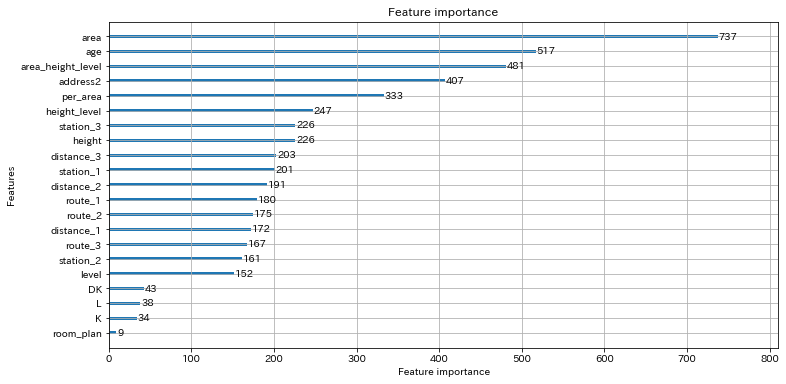

In [578]:
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
print(r2_score(y_test, y_pred))
lgb.plot_importance(model, figsize=(12, 6))
plt.show()

In [579]:
pred = list(model.predict(X, num_iteration=model.best_iteration))
pred = pd.Series(pred, name="予測値")
diff = pd.Series(df_for_search['賃料+管理費']-pred,name="予測値との差")

df_search = pd.concat([df_for_search,diff,pred], axis=1)
df_search = df_search.sort_values("予測値との差")
df_search = df_search[["マンション名",'賃料+管理費', '予測値',  '予測値との差', '詳細URL']]
df_search.to_csv(f'otoku_{item}_all.csv', sep = '\t',encoding='utf-16')

In [300]:
%matplotlib inline

import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [312]:
# カテゴリー変数
categorical_features = []

# 5-fold CVモデルの学習
# 5つのモデルを保存するリストの初期化
models = []

# 学習データの数だけの数列（0行から最終行まで連番）
row_no_list = list(range(len(y)))

# KFoldクラスをインスタンス化（これを使って5分割する）
K_fold = StratifiedKFold(n_splits=5, shuffle=True,  random_state=42)

In [ ]:
trainを5分割してるのか。。今回の場合は、データ自体を5分割したいんだよなぁ。。
だったら、y_evalをテストデータとみなして、予測するか。

In [306]:
for train_cv_no, eval_cv_no in K_fold.split(row_no_list, y):
    #print('train_cv_no',train_cv_no)
    #print('eval_cv_no',eval_cv_no)
    print(len(model.predict(X_eval_cv, num_iteration=model.best_iteration)))

294
294
294
294
294


/Users/lightblue/.pyenv/versions/3.7.5/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [337]:
#main
#X全部を分割
# KFoldクラスで分割した回数だけ実行（ここでは5回）
count = 0
for train_cv_no, eval_cv_no in K_fold.split(row_no_list, y):
    # ilocで取り出す行を指定
    X_train_cv = X.iloc[train_cv_no, :]
    y_train_cv = pd.Series(y).iloc[train_cv_no]
    X_eval_cv = X.iloc[eval_cv_no, :]
    y_eval_cv = pd.Series(y).iloc[eval_cv_no]
    df_cv = df.iloc[eval_cv_no, :].reset_index()
    
    # 学習用
    lgb_train = lgb.Dataset(X_train_cv, y_train_cv,
                            categorical_feature=categorical_features,
                            free_raw_data=False)
    # 検証用
    lgb_eval = lgb.Dataset(X_eval_cv, y_eval_cv, reference=lgb_train,
                           categorical_feature=categorical_features,
                           free_raw_data=False)
    
    # パラメータを設定
    params = {'task': 'train',                # 学習、トレーニング ⇔　予測predict
              'boosting_type': 'gbdt',        # 勾配ブースティング
              'objective': 'regression',      # 目的関数：多値分類、マルチクラス分類
              'metric': 'rmse',      # 分類モデルの性能を測る指標
              #'num_class': 3,                 # 目的変数のクラス数
              'learning_rate': 0.02,          # 学習率（初期値0.1）
              'num_leaves': 23,               # 決定木の複雑度を調整（初期値31）
              'min_data_in_leaf': 20,          # データの最小数（初期値20）
             }
    
    # 学習
    evaluation_results = {}                                     # 学習の経過を保存する箱
    model = lgb.train(params,                                   # 上記で設定したパラメータ
                      lgb_train,                                # 使用するデータセット
                      num_boost_round=1000,                     # 学習の回数
                      valid_names=['train', 'valid'],           # 学習経過で表示する名称
                      valid_sets=[lgb_train, lgb_eval],         # モデル検証のデータセット
                      evals_result=evaluation_results,          # 学習の経過を保存
                      categorical_feature=categorical_features, # カテゴリー変数を設定
                      early_stopping_rounds=20,              # アーリーストッピング# 学習
                      verbose_eval=-1)                          # 学習の経過の非表示
    
    # テストデータで予測する
    #y_pred = model.predict(X_eval_cv, num_iteration=model.best_iteration)
    #y_pred_max = np.argmax(y_pred, axis=1)
    
    pred = list(model.predict(X_eval_cv, num_iteration=model.best_iteration))
    pred = pd.Series(pred, name="予測値")
    
    print('pred',pred)
    print('df_for_search_cv',df_for_search_cv)
    print('X_eval_cv',X_eval_cv)
    
    # 学習が終わったモデルをリストに入れておく
    models.append(model) 
    '''
    diff = pd.Series(df_for_search_cv["賃料+管理費"]-pred,name="予測値との差")
    df_search = pd.concat([df_for_search_cv,diff,pred], axis=1)
    df_search = df_search.sort_values("予測値との差")
    df_search = df_search[["マンション名",'賃料+管理費', '予測値',  '予測値との差', '詳細URL']]
    df_search.to_csv(f'otoku_{count}.csv', sep = '\t',encoding='utf-16')
    count += 1
    '''

/Users/lightblue/.pyenv/versions/3.7.5/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1263
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 23
[LightGBM] [Info] Start training from score 201020.918367
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[629]	train's rmse: 11391	valid's rmse: 12094.3
pred 0      233720.370809
1      307966.883145
2       97028.771515
3       99436.232418
4      101986.733040
           ...      
289    172933.276996
290    177387.683123
291    176196.733370
292     98193.944690
293    181137.033356
Name: 予測値, Length: 294, dtype: float64
df_for_search_cv      index                    マンション名           住所  築年数  建物高さ    階        賃料  \
0        7          オーパスレジデンス日本橋イースト    東京都中央区新川２    1    12   2階  32150

Early stopping, best iteration is:
[662]	train's rmse: 11156.7	valid's rmse: 11131.5
pred 0      277498.765563
1      334843.784638
2      339923.965226
3       96795.213340
4      108124.443576
           ...      
289    185833.031934
290     96379.950714
291     97406.370597
292    112047.521613
293    180947.448978
Name: 予測値, Length: 294, dtype: float64
df_for_search_cv      index                    マンション名           住所  築年数  建物高さ    階        賃料  \
0        7          オーパスレジデンス日本橋イースト    東京都中央区新川２    1    12   2階  321500.0   
1        8          オーパスレジデンス日本橋イースト    東京都中央区新川２    1    12   5階  326000.0   
2       15                  レジディア月島3    東京都中央区月島３   13    12   9階   94000.0   
3       23                  レジディア月島3    東京都中央区月島３   13    12  11階   99000.0   
4       24                  レジディア月島3    東京都中央区月島３   13    12  10階  173000.0   
..     ...                       ...          ...  ...   ...  ...       ...   
289   1450                パークキューブ八丁堀   東京都中央区八丁堀４   12    16  14階  180

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1265
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 23
[LightGBM] [Info] Start training from score 200190.391156
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[1000]	train's rmse: 6614.45	valid's rmse: 23333.7
pred 0      155367.535344
1      276943.040445
2      300267.540369
3      342150.885923
4      104200.259377
           ...      
289    172772.234330
290    185428.191574
291    183876.237694
292    126459.066737
293     86734.807309
Name: 予測値, Length: 294, dtype: float64
df_for_search_cv      index                    マンション名           住所  築年数  建物高さ    階        賃料  \
0        7          オーパスレジデンス日本橋イースト    東京都中央区新川２    1    12   2階  321500.0   
1        8          オーパスレジデンス日本橋イースト    東

In [316]:
#X全部を分割
# KFoldクラスで分割した回数だけ実行（ここでは5回）
count = 0
for train_cv_no, eval_cv_no in K_fold.split(row_no_list, y):
    # ilocで取り出す行を指定
    X_train_cv = X.iloc[train_cv_no, :]
    y_train_cv = pd.Series(y).iloc[train_cv_no]
    X_eval_cv = X.iloc[eval_cv_no, :]
    y_eval_cv = pd.Series(y).iloc[eval_cv_no]
    df_for_search_cv = df_for_search.iloc[eval_cv_no, :]
    
    # 学習用
    lgb_train = lgb.Dataset(X_train_cv, y_train_cv,
                            categorical_feature=categorical_features,
                            free_raw_data=False)
    # 検証用
    lgb_eval = lgb.Dataset(X_eval_cv, y_eval_cv, reference=lgb_train,
                           categorical_feature=categorical_features,
                           free_raw_data=False)
    
    # パラメータを設定
    params = {'task': 'train',                # 学習、トレーニング ⇔　予測predict
              'boosting_type': 'gbdt',        # 勾配ブースティング
              'objective': 'regression',      # 目的関数：多値分類、マルチクラス分類
              'metric': 'rmse',      # 分類モデルの性能を測る指標
              #'num_class': 3,                 # 目的変数のクラス数
              'learning_rate': 0.02,          # 学習率（初期値0.1）
              'num_leaves': 23,               # 決定木の複雑度を調整（初期値31）
              'min_data_in_leaf': 20,          # データの最小数（初期値20）
             }
    
    # 学習
    evaluation_results = {}                                     # 学習の経過を保存する箱
    model = lgb.train(params,                                   # 上記で設定したパラメータ
                      lgb_train,                                # 使用するデータセット
                      num_boost_round=1000,                     # 学習の回数
                      valid_names=['train', 'valid'],           # 学習経過で表示する名称
                      valid_sets=[lgb_train, lgb_eval],         # モデル検証のデータセット
                      evals_result=evaluation_results,          # 学習の経過を保存
                      categorical_feature=categorical_features, # カテゴリー変数を設定
                      early_stopping_rounds=20,              # アーリーストッピング# 学習
                      verbose_eval=-1)                          # 学習の経過の非表示
    
    # テストデータで予測する
    y_pred = model.predict(X_eval_cv, num_iteration=model.best_iteration)
    #y_pred_max = np.argmax(y_pred, axis=1)
    
    # 学習が終わったモデルをリストに入れておく
    #models.append(model) 
    diff = pd.Series(df_for_search_cv["賃料+管理費"]-pred,name="予測値との差")
    df_search = pd.concat([df_for_search_cv,diff,pred], axis=1)
    df_search = df_search.sort_values("予測値との差")
    df_search = df_search[["マンション名",'賃料+管理費', '予測値',  '予測値との差', '詳細URL']]
    df_search.to_csv(f'otoku_{count}.csv', sep = '\t',encoding='utf-16')
    count += 1

/Users/lightblue/.pyenv/versions/3.7.5/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1266
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 23
[LightGBM] [Info] Start training from score 200987.159864
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[908]	train's rmse: 8669.5	valid's rmse: 17032.3
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1268
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 23
[LightGBM] [Info] Start training from score 200865.391156
Training until validation sco

In [278]:
# KFoldクラスで分割した回数だけ実行（ここでは5回）
count = 0
for train_cv_no, eval_cv_no in K_fold.split(row_no_list, y_train):
    # ilocで取り出す行を指定
    X_train_cv = X_train.iloc[train_cv_no, :]
    y_train_cv = pd.Series(y_train).iloc[train_cv_no]
    X_eval_cv = X_train.iloc[eval_cv_no, :]
    y_eval_cv = pd.Series(y_train).iloc[eval_cv_no]
    df_for_search_cv = df_for_search.iloc[eval_cv_no, :]
    
    # 学習用
    lgb_train = lgb.Dataset(X_train_cv, y_train_cv,
                            categorical_feature=categorical_features,
                            free_raw_data=False)
    # 検証用
    lgb_eval = lgb.Dataset(X_eval_cv, y_eval_cv, reference=lgb_train,
                           categorical_feature=categorical_features,
                           free_raw_data=False)
    
    # パラメータを設定
    params = {'task': 'train',                # 学習、トレーニング ⇔　予測predict
              'boosting_type': 'gbdt',        # 勾配ブースティング
              'objective': 'regression',      # 目的関数：多値分類、マルチクラス分類
              'metric': 'rmse',      # 分類モデルの性能を測る指標
              #'num_class': 3,                 # 目的変数のクラス数
              'learning_rate': 0.02,          # 学習率（初期値0.1）
              'num_leaves': 23,               # 決定木の複雑度を調整（初期値31）
              'min_data_in_leaf': 20,          # データの最小数（初期値20）
             }
    
    # 学習
    evaluation_results = {}                                     # 学習の経過を保存する箱
    model = lgb.train(params,                                   # 上記で設定したパラメータ
                      lgb_train,                                # 使用するデータセット
                      num_boost_round=1000,                     # 学習の回数
                      valid_names=['train', 'valid'],           # 学習経過で表示する名称
                      valid_sets=[lgb_train, lgb_eval],         # モデル検証のデータセット
                      evals_result=evaluation_results,          # 学習の経過を保存
                      categorical_feature=categorical_features, # カテゴリー変数を設定
                      early_stopping_rounds=20,              # アーリーストッピング# 学習
                      verbose_eval=-1)                          # 学習の経過の非表示
    
    # テストデータで予測する
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)
    #y_pred_max = np.argmax(y_pred, axis=1)

    #print(r2_score(y_test, y_pred))
    #lgb.plot_importance(model, figsize=(12, 6))

    # Accuracy を計算する
    #accuracy = sum(y_test == y_pred_max) / len(y_test)
    #print('accuracy:', accuracy)
    #r2_score = r2_score(y_test, y_pred)
    #print('r2_score',r2_score)
    
    # 学習が終わったモデルをリストに入れておく
    models.append(model) 
    
    diff = pd.Series(df_for_search[]["賃料+管理費"]-pred,name="予測値との差")
    df_search = pd.concat([df_for_search,diff,pred], axis=1)
    df_search = df_search.sort_values("予測値との差")
    df_search = df_search[["マンション名",'賃料+管理費', '予測値',  '予測値との差', '詳細URL']]
    df_search.to_csv('otoku.csv', sep = '\t',encoding='utf-16')
    
    #pred = list(model.predict(X_test, num_iteration=model.best_iteration))
    #pred = pd.Series(pred, name="予測値")
    #diff = pd.Series(y_test-pred,name="予測値との差")
    #df_search = pd.concat([X_test,y_test,pred,diff], axis=1)
    #df_search = df_search.sort_values("予測値との差")
    #df_search = df_search[["マンション名",'賃料+管理費', '予測値',  '予測値との差', '詳細URL']]
    df_search.to_csv(f'otoku_{count}.csv', sep = '\t',encoding='utf-16')
    count += 1

/Users/lightblue/.pyenv/versions/3.7.5/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1238
[LightGBM] [Info] Number of data points in the train set: 940, number of used features: 23
[LightGBM] [Info] Start training from score 200800.638298
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[540]	train's rmse: 13236.6	valid's rmse: 29767.1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1235
[LightGBM] [Info] Number of data points in the train set: 941, number of used features: 23
[LightGBM] [Info] Start training from score 200793.942614
Training until validation scor